# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('C://Users//krish//OneDrive//Desktop//data science//projects//customer segmentation//Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# statisticlinfo of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# datatype info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df_1=df.drop(columns=['CustomerID'],axis=1)
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory data analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

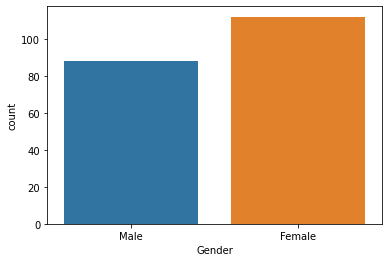

In [6]:
sns.countplot(df_1['Gender'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

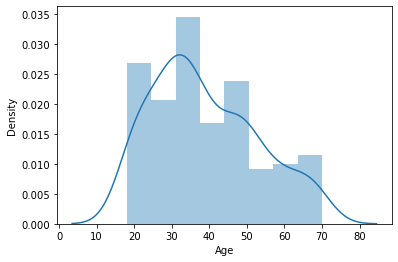

In [7]:
sns.distplot(df_1['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

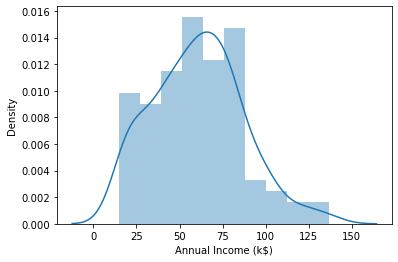

In [8]:
sns.distplot(df_1['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

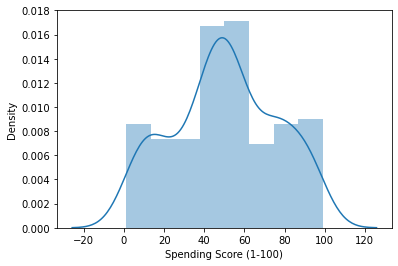

In [9]:
sns.distplot(df_1['Spending Score (1-100)'])

# correlation matrix

<AxesSubplot:>

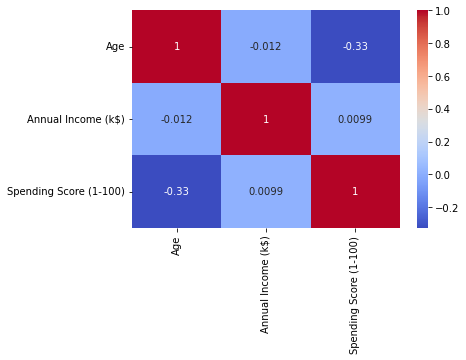

In [10]:
corr=df_1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [11]:
df_1['Male']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [12]:
df_new=df_1.drop(columns=['Gender','Age','Male'],axis=1)
df_new.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Clustering

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_new['Annual Income (k$)']=scale.fit_transform(df_new[['Annual Income (k$)']])
df_new['Spending Score (1-100)']=scale.fit_transform(df_new[['Spending Score (1-100)']])
df_new.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

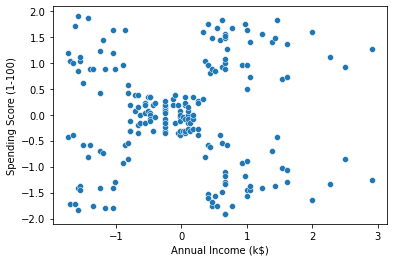

In [14]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df_new)

In [15]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=5)
labels=kmeans_model.fit_predict(df_new)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [16]:
centers=kmeans_model.cluster_centers_
centers


array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

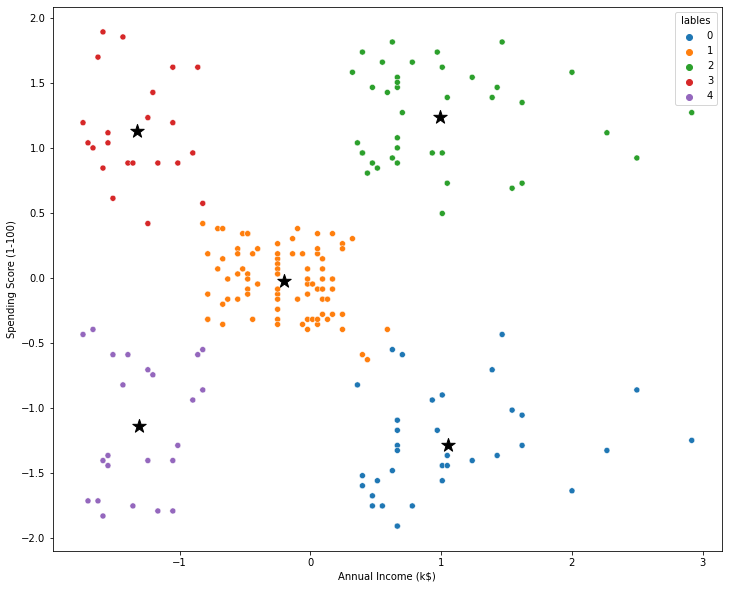

In [17]:
df_new['lables']=labels
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_new,x='Annual Income (k$)',y='Spending Score (1-100)',hue='lables',palette='tab10')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=200,color='black',marker='*')
plt.show()

In [18]:
#[each value of k is within cluster sum of square of distance of each point with centroid of cluster wcss is max of least K ]
wcss=[] 
#assume max no of clusters is 10 so give range to (1,11)
for i in range(1,11): 
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
wcss

[700.555,
 384.18772958718625,
 236.3812521138425,
 134.71607673373487,
 65.56840815571681,
 55.057348270386,
 45.17176380052854,
 38.34680083233566,
 32.901218974984204,
 30.223713575076296]

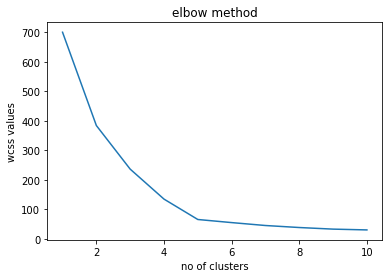

In [19]:
#plotting elbow
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss values')
plt.show()